In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame (replace 'file_path' with your actual path)
file_path = 'hasil/0905_2_N2O_Agriculture_OutlierDetection_5_Update09062024_VotingBased.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())


      Date  Year Experiment   DataUse Replication     Month Vegetation  \
0   2/9/12  2012   BCSE_KBS  Building          R1  February       Corn   
1  2/10/12  2012   BCSE_KBS  Building          R1  February       Corn   
2  2/18/12  2012   BCSE_KBS  Building          R1  February       Corn   
3  2/19/12  2012   BCSE_KBS  Building          R1  February       Corn   
4  3/16/12  2012   BCSE_KBS  Building          R1     March       Corn   

  VegType       N2O  N_rate  ...  zscore_outlier  if_outlier  dbscan_outlier  \
0  Annual  3.896742     170  ...               1           1               1   
1  Annual  2.190218     170  ...               1           1               1   
2  Annual  3.542594     170  ...               1           1               1   
3  Annual  3.342870     170  ...               1           1               1   
4  Annual  2.947778     170  ...               1           1               1   

   ocsvm_outlier  lof_outlier  gaussianpdf_outlier  bgm_outlier  nb_outlie

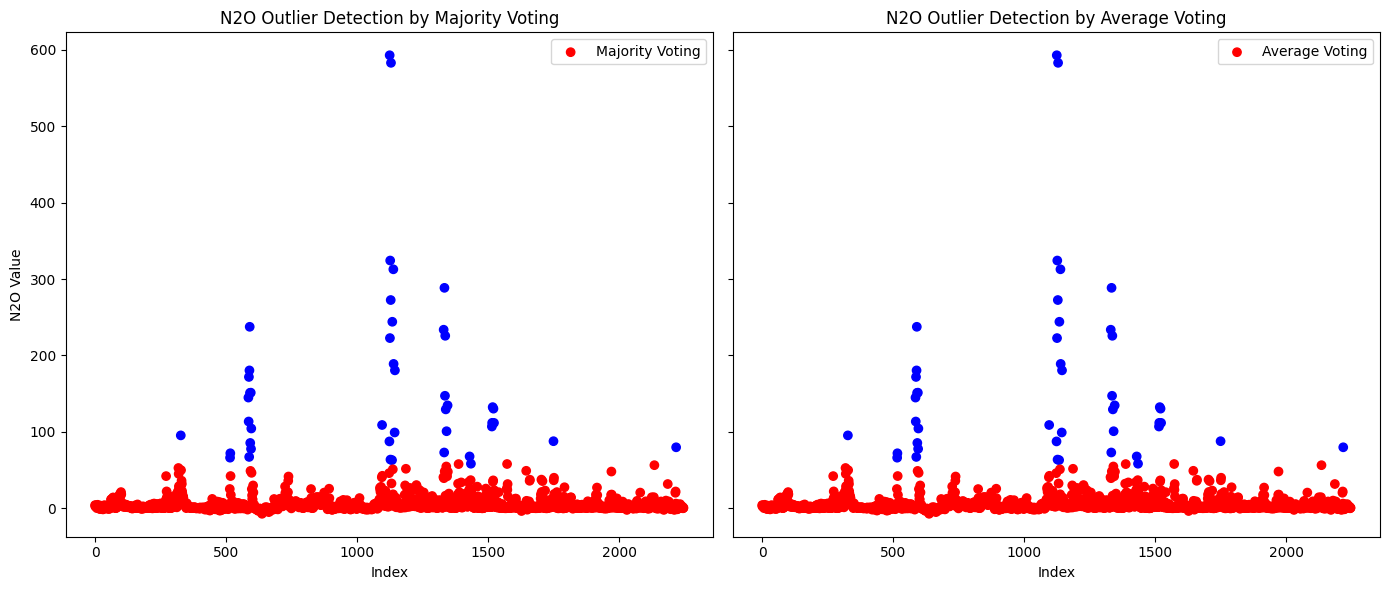

In [7]:
import matplotlib.pyplot as plt

# Extract relevant columns for plotting
n2o_values = data['N2O']
majority_voting = data['majority_voting']
average_voting = data['average_voting']

# Create a figure with 2 subplots in 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for majority_voting
axes[0].scatter(data.index, n2o_values, c=majority_voting, cmap='bwr', label='Majority Voting')
axes[0].set_title('N2O Outlier Detection by Majority Voting')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('N2O Value')
axes[0].legend()

# Plot for average_voting
axes[1].scatter(data.index, n2o_values, c=average_voting, cmap='bwr', label='Average Voting')
axes[1].set_title('N2O Outlier Detection by Average Voting')
axes[1].set_xlabel('Index')
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


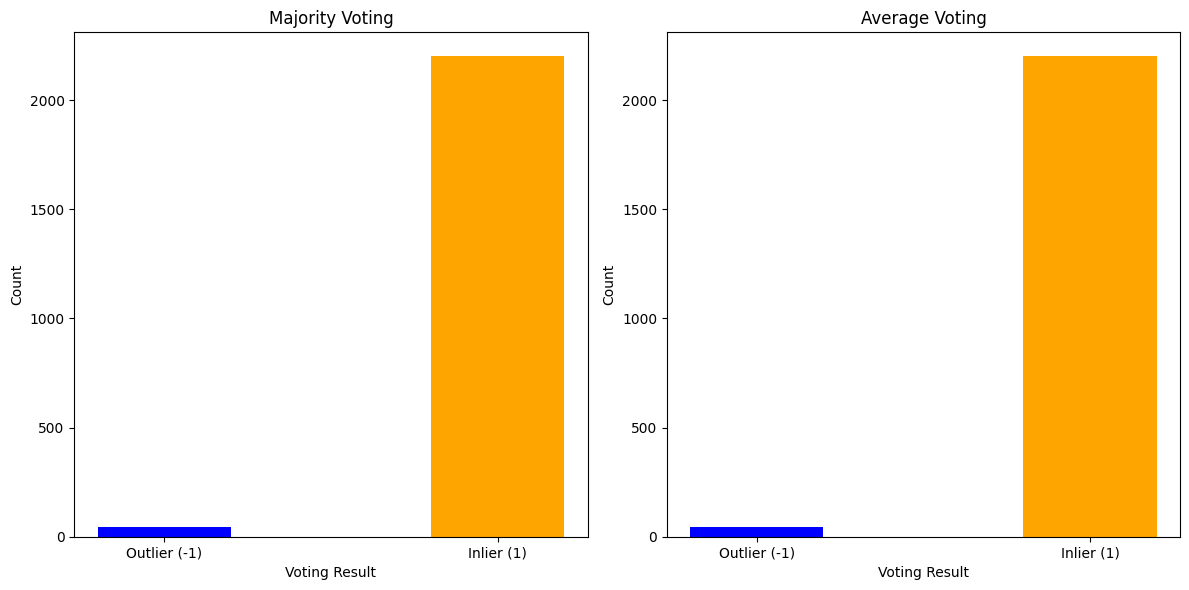

In [8]:
import matplotlib.pyplot as plt

# Count the inliers and outliers for majority_voting and average_voting
majority_voting_counts = data['majority_voting'].value_counts().sort_index()
average_voting_counts = data['average_voting'].value_counts().sort_index()

# Create subplots for the two voting methods
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for majority voting
axes[0].bar(majority_voting_counts.index, majority_voting_counts.values, color=['blue', 'orange'])
axes[0].set_title('Majority Voting')
axes[0].set_xlabel('Voting Result')
axes[0].set_ylabel('Count')
axes[0].set_xticks(majority_voting_counts.index)
axes[0].set_xticklabels(['Outlier (-1)', 'Inlier (1)'])

# Plot for average voting
axes[1].bar(average_voting_counts.index, average_voting_counts.values, color=['blue', 'orange'])
axes[1].set_title('Average Voting')
axes[1].set_xlabel('Voting Result')
axes[1].set_ylabel('Count')
axes[1].set_xticks(average_voting_counts.index)
axes[1].set_xticklabels(['Outlier (-1)', 'Inlier (1)'])

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()
